In [ ]:
!pip install -U cade
!pip install git+https://github.com/valedica/gensim.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 99 kB 3.9 MB/s 
     |████████████████████████████████| 132 kB 34.3 MB/s 
     |████████████████████████████████| 79 kB 6.7 MB/s 
     |████████████████████████████████| 9.0 MB 14.9 MB/s 
     |████████████████████████████████| 139 kB 49.6 MB/s 
     |████████████████████████████████| 127 kB 43.8 MB/s 
  Created wheel for smart-open: filename=smart_open-1.10.0-py3-none-any.whl size=90641 sha256=17f000ef958772a04ae057be5fc51aed3fa2612be06e39de2bb87937817f3fe6
  Stored in directory: /root/.cache/pip/wheels/1f/e5/fc/7412935a7184efc8ad377e948c81b1cc99b6a02eb8dc7c918c
Successfully built smart-open
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: smart-open
    Found existing installation: smart-open 5.2.1
    Uninstalling 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/ProgettiDataScience-SAD/1 ANNO 2 SEMESTRE/DATA SEMANTICS/Progetto/Newspaper/')

# CADE 1996-2000 + 2001

In [ ]:
!cat file9600.txt file2001.txt > pre_2001_compass.txt

In [ ]:
# train the compass

from cade.cade import CADE
from gensim.models.word2vec import Word2Vec
aligner_pre = CADE(size=100)

aligner_pre.train_compass("pre_2001_compass.txt", overwrite=False)

Training the compass from scratch.


/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
# train the slices

slice_pre2001 = aligner_pre.train_slice("file9600.txt", save=False)
slice_2001 = aligner_pre.train_slice("file2001.txt", save=False)

Training embeddings: slice file9600.txt.


/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


Initializing embeddings from compass.
Training embeddings: slice file2001.txt.
Initializing embeddings from compass.


In [ ]:
from scipy.spatial.distance import cosine
print(1 - cosine(slice_pre2001.wv["attack"], slice_2001.wv["attack"]))

0.7919402122497559


## Slice pre 2001 - Most Similar words for a word

In [ ]:
# slice_pre2001.wv.most_similar("al-qaeda") # not in vocabulary between 1996 and 2000

In [ ]:
slice_pre2001.wv.most_similar("bin-laden")

[('osama', 0.8550844192504883),
 ('yousef', 0.752044677734375),
 ('ahmed', 0.7117928862571716),
 ('terrorist', 0.6918145418167114),
 ('razick', 0.6852773427963257),
 ('bombings', 0.6795031428337097),
 ('salah', 0.6784151792526245),
 ('ivankov', 0.6781501770019531),
 ('abouhalima', 0.6742649674415588),
 ('exile', 0.668192446231842)]

In [ ]:
slice_pre2001.wv.most_similar("airplane")

[('airplanes', 0.8143612146377563),
 ('jet', 0.7865812182426453),
 ('plane', 0.7776260375976562),
 ('aircraft', 0.7574988603591919),
 ('aboard', 0.7527272701263428),
 ('cockpit', 0.7500735521316528),
 ('planes', 0.7388768196105957),
 ('cargo', 0.737835168838501),
 ('crashed', 0.727554440498352),
 ('supersonic', 0.7228059768676758)]

In [ ]:
slice_pre2001.wv.most_similar("twin-towers")

[('holmdel', 0.7232102155685425),
 ('mercersburg', 0.7077374458312988),
 ('breland', 0.7074423432350159),
 ('oakmont', 0.7060800194740295),
 ('olivares', 0.7056813836097717),
 ('ozaki', 0.7017580270767212),
 ('vianney', 0.699039101600647),
 ('johansson', 0.6988382339477539),
 ('siragusa', 0.6987785696983337),
 ('chelmsford', 0.6968560814857483)]

In [ ]:
slice_pre2001.wv.most_similar("tower")

[('towers', 0.7212316393852234),
 ('eiffel', 0.6858029365539551),
 ('elevators', 0.6469831466674805),
 ('atrium', 0.636841893196106),
 ('overlooking', 0.6338781118392944),
 ('perched', 0.6237609386444092),
 ('elevator', 0.5982163548469543),
 ('skyscrapers', 0.5981475114822388),
 ('atop', 0.5784163475036621),
 ('wilshire', 0.5772830247879028)]

In [ ]:
slice_pre2001.wv.most_similar("terrorism")

[('terrorists', 0.7811524868011475),
 ('terrorist', 0.7682565450668335),
 ('genocide', 0.7167893648147583),
 ('atrocities', 0.6990289688110352),
 ('troublesome', 0.6630445122718811),
 ('warfare', 0.6519030332565308),
 ('violence', 0.6364759206771851),
 ('enemy', 0.6343066096305847),
 ('sabotage', 0.632565438747406),
 ('aggression', 0.6308839917182922)]

In [ ]:
slice_pre2001.wv.most_similar("world-trade-center")

[('bombing', 0.7271280884742737),
 ('riyadh', 0.7119678258895874),
 ('ramzi', 0.7110915780067444),
 ('yousef', 0.6969970464706421),
 ('mastermind', 0.6634491682052612),
 ('bombed', 0.6528828144073486),
 ('murrah', 0.6469144225120544),
 ('bomb', 0.6454052925109863),
 ('lockerbie', 0.6318008899688721),
 ('bombings', 0.6186965703964233)]

In [ ]:
slice_pre2001.wv.most_similar("attack")

[('attacks', 0.7661454081535339),
 ('shelling', 0.5587970614433289),
 ('assassinations', 0.5536189079284668),
 ('airstrikes', 0.548426628112793),
 ('attacked', 0.5428334474563599),
 ('reprisals', 0.5378527641296387),
 ('bombings', 0.5289050936698914),
 ('bombing', 0.5280107259750366),
 ('casualties', 0.5278836488723755),
 ('assault', 0.5278712511062622)]

In [ ]:
slice_pre2001.wv.most_similar("hijacked") 

# 'hijacker',
#  'hijackings',
#  'hijackers',
#  'hijack',
#  'hijacks',
#  'hijacking',
#  'hijacked',
#  'hijack',
#  'hijacks',
#  'hijacking'

[('downed', 0.6680201292037964),
 ('hijacking', 0.6537010669708252),
 ('cockpits', 0.6506870985031128),
 ('mig', 0.6500620245933533),
 ('chartered', 0.644697368144989),
 ('piloting', 0.6428894400596619),
 ('flew', 0.6406901478767395),
 ('fighter', 0.6344217658042908),
 ('comoros', 0.6253393888473511),
 ('taxied', 0.6236627101898193)]

In [ ]:
slice_pre2001.wv.most_similar("firefighter")

[('fireman', 0.6418340802192688),
 ('sergeant', 0.6331508159637451),
 ('firefighters', 0.6038467288017273),
 ('capt', 0.5938471555709839),
 ('broughton', 0.5802285671234131),
 ('medic', 0.5741819739341736),
 ('policeman', 0.5603866577148438),
 ('smit', 0.5587625503540039),
 ('uniformed', 0.5559185743331909),
 ('sims', 0.54385906457901)]

In [ ]:
slice_pre2001.wv.most_similar("afghanistan")

[('taliban', 0.8380297422409058),
 ('rwanda', 0.8039339780807495),
 ('serbia', 0.8007467985153198),
 ('separatists', 0.7998696565628052),
 ('kurds', 0.7976086139678955),
 ('chechnya', 0.7903115749359131),
 ('hutu', 0.7897152900695801),
 ('burundi', 0.7884032130241394),
 ('albania', 0.7879840731620789),
 ('kabul', 0.78412926197052)]

In [ ]:
slice_pre2001.wv.most_similar("islam")

[('judaism', 0.7803740501403809),
 ('farrakhan', 0.772940993309021),
 ('christianity', 0.771716296672821),
 ('muslim', 0.7630121111869812),
 ('hindu', 0.7549815773963928),
 ('islamic', 0.7316941022872925),
 ('secular', 0.7305837869644165),
 ('fundamentalist', 0.7299008965492249),
 ('christians', 0.7273857593536377),
 ('teachings', 0.7267932891845703)]

In [ ]:
slice_pre2001.wv.most_similar("jihad")

[('militants', 0.7806532979011536),
 ('fundamentalists', 0.7522597312927246),
 ('militant', 0.7492303252220154),
 ('sunni', 0.7481479644775391),
 ('fundamentalist', 0.7471657991409302),
 ('insurgents', 0.7470405101776123),
 ('algeria', 0.7374951243400574),
 ('insurgency', 0.7374300360679626),
 ('fundamentalism', 0.7320253849029541),
 ('lashkar', 0.7261451482772827)]

## Slice 2001 - Most Similar words for a word

In [ ]:
slice_2001.wv.most_similar("al-qaeda")

[('bin-laden', 0.7955716848373413),
 ('hezbollah', 0.7771306037902832),
 ('kherchtou', 0.7271298170089722),
 ('suspected', 0.717078685760498),
 ('jordanian', 0.7005151510238647),
 ('hijackers', 0.6963253021240234),
 ('lieutenants', 0.6953931450843811),
 ('zawahiri', 0.6830292344093323),
 ('abu', 0.6711176633834839),
 ('hijazi', 0.6706815958023071)]

In [ ]:
slice_2001.wv.most_similar("bin-laden")

[('al-qaeda', 0.7955716848373413),
 ('osama', 0.7791723608970642),
 ('hezbollah', 0.6832228899002075),
 ('usama', 0.6717376708984375),
 ('terrorists', 0.671410858631134),
 ('mastermind', 0.6689716577529907),
 ('jihad', 0.6445539593696594),
 ('jordanian', 0.6409204602241516),
 ('operatives', 0.6403447389602661),
 ('kherchtou', 0.6400388479232788)]

In [ ]:
slice_2001.wv.most_similar("airplane")

[('planes', 0.733832597732544),
 ('jet', 0.7068569660186768),
 ('cockpit', 0.698836088180542),
 ('plane', 0.6950972080230713),
 ('airplanes', 0.690739631652832),
 ('cruiser', 0.6751049757003784),
 ('supersonic', 0.670008659362793),
 ('hijacked', 0.6693158149719238),
 ('passenger', 0.6631397008895874),
 ('sonic', 0.6625655293464661)]

In [ ]:
slice_2001.wv.most_similar("twin-towers")

[('world-trade-center', 0.8632221221923828),
 ('towers', 0.7752058506011963),
 ('jetliners', 0.7549132704734802),
 ('hijacked', 0.7302224636077881),
 ('crashing', 0.7298687696456909),
 ('wreckage', 0.7245349287986755),
 ('bomb', 0.7171655893325806),
 ('blast', 0.7099294662475586),
 ('collapsed', 0.7075028419494629),
 ('bombed', 0.6924573183059692)]

In [ ]:
slice_2001.wv.most_similar("tower")

[('towers', 0.7228275537490845),
 ('world-trade-center', 0.7224438786506653),
 ('floors', 0.6417394280433655),
 ('twin-towers', 0.6205546855926514),
 ('girders', 0.6026053428649902),
 ('crashed', 0.5865208506584167),
 ('building', 0.577844500541687),
 ('floor', 0.5626860857009888),
 ('collapsing', 0.560544490814209),
 ('collapsed', 0.5603823661804199)]

In [ ]:
slice_2001.wv.most_similar("terrorism")

[('terror', 0.7940824627876282),
 ('terrorists', 0.7522097229957581),
 ('enemies', 0.7023332118988037),
 ('allies', 0.6765090227127075),
 ('iraq', 0.666138768196106),
 ('retaliation', 0.6511011123657227),
 ('evil', 0.6494537591934204),
 ('threat', 0.6487106084823608),
 ('extremism', 0.6389309167861938),
 ('israel', 0.6264454126358032)]

In [ ]:
slice_2001.wv.most_similar("world-trade-center")

[('twin-towers', 0.8632220029830933),
 ('towers', 0.8584898114204407),
 ('tower', 0.7224438190460205),
 ('pentagon', 0.6948170065879822),
 ('hijacked', 0.6697230339050293),
 ('jetliners', 0.663455605506897),
 ('crashed', 0.6456199288368225),
 ('collapsed', 0.637319803237915),
 ('crashing', 0.6361017227172852),
 ('bomb', 0.6324036717414856)]

In [ ]:
slice_2001.wv.most_similar("attack")

[('attacks', 0.7673993706703186),
 ('bombing', 0.6652534008026123),
 ('strikes', 0.655195951461792),
 ('bomb', 0.6389036178588867),
 ('twin-towers', 0.6329392790794373),
 ('bombed', 0.6205253005027771),
 ('pentagon', 0.61795973777771),
 ('assault', 0.6098317503929138),
 ('threat', 0.595636248588562),
 ('warplanes', 0.586471676826477)]

In [ ]:
slice_2001.wv.most_similar("hijacked") 

# 'hijacker',
#  'hijackings',
#  'hijackers',
#  'hijack',
#  'hijacks',
#  'hijacking',
#  'hijacked',
#  'hijack',
#  'hijacks',
#  'hijacking'

[('crashed', 0.8803711533546448),
 ('airliner', 0.8467075824737549),
 ('jetliner', 0.8417251706123352),
 ('jetliners', 0.8122941851615906),
 ('airliners', 0.809431791305542),
 ('planes', 0.8049288988113403),
 ('bombed', 0.7931340336799622),
 ('lockerbie', 0.7669767141342163),
 ('jet', 0.7661666870117188),
 ('aboard', 0.7641749382019043)]

In [ ]:
slice_2001.wv.most_similar("firefighter")

[('capt', 0.7378979921340942),
 ('brooks', 0.6594452857971191),
 ('jeremy', 0.6567943096160889),
 ('cdf', 0.6513184309005737),
 ('sanford', 0.6495569944381714),
 ('fisher', 0.6431577801704407),
 ('fitzgerald', 0.6359798908233643),
 ('burns', 0.6290662288665771),
 ('kevin', 0.6233443021774292),
 ('hawkins', 0.6219092607498169)]

In [ ]:
slice_2001.wv.most_similar("afghanistan")

[('afghan', 0.7783044576644897),
 ('soviets', 0.7693973779678345),
 ('pakistan', 0.7645056247711182),
 ('taliban', 0.7563390731811523),
 ('mujahedeen', 0.7396014928817749),
 ('province', 0.7366409301757812),
 ('kabul', 0.7350144386291504),
 ('kosovo', 0.7290639877319336),
 ('afghans', 0.7235617637634277),
 ('commanders', 0.7150369882583618)]

In [ ]:
slice_2001.wv.most_similar("islam")

[('islamic', 0.8308034539222717),
 ('religious', 0.8212262392044067),
 ('muslim', 0.8099234104156494),
 ('muslims', 0.7721512317657471),
 ('religion', 0.7645809650421143),
 ('teachings', 0.7509158253669739),
 ('beliefs', 0.7466042637825012),
 ('radical', 0.744684100151062),
 ('christianity', 0.730954110622406),
 ('interpretation', 0.7253249287605286)]

In [ ]:
slice_2001.wv.most_similar("jihad")

[('militant', 0.848966121673584),
 ('zawahiri', 0.8283421993255615),
 ('militants', 0.8259047865867615),
 ('egyptian', 0.7990703582763672),
 ('hezbollah', 0.7964562177658081),
 ('shiite', 0.7903016805648804),
 ('cleric', 0.7782293558120728),
 ('arabs', 0.7778924703598022),
 ('muslims', 0.7771374583244324),
 ('muslim', 0.7744395136833191)]

## Word in a Slice - Most similar - same word in the other Slice

In [ ]:
slice_pre2001.wv.most_similar(positive=[slice_2001["terrorism"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('terrorism', 0.7772753238677979),
 ('aggression', 0.7086176872253418),
 ('saddam', 0.6786403656005859),
 ('iraq', 0.6567883491516113),
 ('balkans', 0.6448622941970825),
 ('unilateral', 0.6233083009719849),
 ('conflict', 0.6195259094238281),
 ('bloodshed', 0.619439423084259),
 ('atrocities', 0.6104891300201416),
 ('condemnation', 0.6088582277297974)]

In [ ]:
slice_2001.wv.most_similar(positive=[slice_pre2001["terrorism"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('terrorism', 0.7772753238677979),
 ('terror', 0.757623016834259),
 ('terrorists', 0.7531202435493469),
 ('threat', 0.6623786687850952),
 ('iraq', 0.6433452367782593),
 ('extremism', 0.6365066766738892),
 ('suicide', 0.6342463493347168),
 ('threats', 0.6315843462944031),
 ('conflict', 0.6291491985321045),
 ('terrorist', 0.6288189888000488)]

In [ ]:
slice_pre2001.wv.most_similar(positive=[slice_2001["twin-towers"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('blast', 0.7309776544570923),
 ('airliner', 0.6690360307693481),
 ('bomb', 0.6472150087356567),
 ('wreckage', 0.6403986215591431),
 ('detonated', 0.6339936852455139),
 ('ismoil', 0.6299360394477844),
 ('explode', 0.6217695474624634),
 ('malfunction', 0.6052762866020203),
 ('detonate', 0.6045863628387451),
 ('ramzi', 0.6038484573364258)]

In [ ]:
slice_2001.wv.most_similar(positive=[slice_pre2001["twin-towers"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('bogans', 0.7605576515197754),
 ('tiffeny', 0.7374188899993896),
 ('trevino', 0.7349083423614502),
 ('wt', 0.734199583530426),
 ('collison', 0.7294883728027344),
 ('uncannily', 0.7294058203697205),
 ('scurry', 0.7283787727355957),
 ('chaplin', 0.7269548177719116),
 ('defensemen', 0.7244812250137329),
 ('pruett', 0.7234899401664734)]

In [ ]:
slice_pre2001.wv.most_similar(positive=[slice_2001["al-qaeda"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('bin-laden', 0.7614396214485168),
 ('osama', 0.7055106163024902),
 ('hamas', 0.698959231376648),
 ('militia', 0.666801393032074),
 ('militants', 0.6554953455924988),
 ('yousef', 0.6539620757102966),
 ('guerrillas', 0.6451461315155029),
 ('meshal', 0.6414437294006348),
 ('abouhalima', 0.6400164365768433),
 ('ahmed', 0.6394761800765991)]

In [ ]:
# slice_2001.wv.most_similar(positive=[slice_pre2001["al-qaeda"]]) # al-qaeda not in vocabulary

In [ ]:
slice_pre2001.wv.most_similar(positive=[slice_2001["world-trade-center"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('blast', 0.6981077194213867),
 ('world-trade-center', 0.613839864730835),
 ('explosion', 0.597585141658783),
 ('murrah', 0.5458944439888),
 ('bomb', 0.5428616404533386),
 ('bomber', 0.5420258641242981),
 ('khobar', 0.5391802787780762),
 ('fireball', 0.5381196737289429),
 ('wreckage', 0.523976743221283),
 ('twa', 0.5196289420127869)]

In [ ]:
slice_2001.wv.most_similar(positive=[slice_pre2001["world-trade-center"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('bombing', 0.8018749356269836),
 ('khobar', 0.7551249265670776),
 ('murrah', 0.7107271552085876),
 ('yousef', 0.7049874663352966),
 ('embassy', 0.6898303031921387),
 ('bombings', 0.676434338092804),
 ('bomb', 0.6751890182495117),
 ('indicted', 0.6629346013069153),
 ('mastermind', 0.6616884469985962),
 ('twin-towers', 0.6293280124664307)]

In [ ]:
slice_2001.wv.most_similar(positive=[slice_pre2001["hijacked"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('aboard', 0.6697010397911072),
 ('fighter', 0.6630001664161682),
 ('spy', 0.6556459665298462),
 ('hijacked', 0.6490789651870728),
 ('standoff', 0.6455398797988892),
 ('collided', 0.6385390758514404),
 ('airliners', 0.6186279654502869),
 ('submarines', 0.6140946745872498),
 ('downed', 0.6113057136535645),
 ('plowed', 0.608243465423584)]

In [ ]:
slice_pre2001.wv.most_similar(positive=[slice_2001["hijacked"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('crashed', 0.8062416315078735),
 ('airliner', 0.7595731019973755),
 ('downed', 0.7590985894203186),
 ('takeoff', 0.7225618362426758),
 ('aboard', 0.7202339768409729),
 ('jet', 0.7191115021705627),
 ('jetliner', 0.7134943008422852),
 ('flew', 0.7124438285827637),
 ('twa', 0.7050962448120117),
 ('flown', 0.7043946981430054)]

In [ ]:
slice_2001.wv.most_similar(positive=[slice_pre2001["attack"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('attack', 0.804938793182373),
 ('attacks', 0.6210601329803467),
 ('assault', 0.5909746289253235),
 ('bombing', 0.5713927745819092),
 ('strikes', 0.5620739459991455),
 ('warplanes', 0.5439616441726685),
 ('targets', 0.5392125248908997),
 ('airstrikes', 0.5296615362167358),
 ('terror', 0.522660493850708),
 ('deadly', 0.5173525810241699)]

In [ ]:
slice_pre2001.wv.most_similar(positive=[slice_2001["attack"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('attack', 0.804938793182373),
 ('bombing', 0.678598165512085),
 ('airstrikes', 0.628943145275116),
 ('attacks', 0.6285187005996704),
 ('blast', 0.6260905265808105),
 ('bombings', 0.6103291511535645),
 ('explosion', 0.6098842024803162),
 ('riyadh', 0.5965247750282288),
 ('bomb', 0.5927532911300659),
 ('casualties', 0.5791033506393433)]

In [ ]:
slice_2001.wv.most_similar(positive=[slice_pre2001["airplane"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('airplane', 0.822155237197876),
 ('jet', 0.7785786390304565),
 ('planes', 0.7585258483886719),
 ('airplanes', 0.736498236656189),
 ('airliners', 0.7334261536598206),
 ('airliner', 0.7309604287147522),
 ('aboard', 0.7301803231239319),
 ('aircraft', 0.7295169234275818),
 ('cockpit', 0.7240784168243408),
 ('plane', 0.7231499552726746)]

In [ ]:
slice_pre2001.wv.most_similar(positive=[slice_2001["airplane"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('airplane', 0.822155237197876),
 ('takeoff', 0.7325868010520935),
 ('plane', 0.7269446849822998),
 ('airplanes', 0.7177016735076904),
 ('jetliner', 0.7165548801422119),
 ('propeller', 0.7117652893066406),
 ('jet', 0.7049219608306885),
 ('piloting', 0.7047436237335205),
 ('cockpit', 0.6919043660163879),
 ('airliner', 0.6916804313659668)]

In [ ]:
slice_2001.wv.most_similar(positive=[slice_pre2001["islam"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('islam', 0.8106851577758789),
 ('muslim', 0.8016345500946045),
 ('islamic', 0.7658110857009888),
 ('muslims', 0.7491205334663391),
 ('religions', 0.729802668094635),
 ('radical', 0.7060784101486206),
 ('religious', 0.7006723284721375),
 ('teachings', 0.6924413442611694),
 ('christianity', 0.6915755271911621),
 ('fundamentalist', 0.6914461255073547)]

In [ ]:
slice_pre2001.wv.most_similar(positive=[slice_2001["islam"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('islam', 0.8106851577758789),
 ('christianity', 0.7953363656997681),
 ('secular', 0.7739717364311218),
 ('judaism', 0.7737718224525452),
 ('buddhism', 0.7726982831954956),
 ('islamic', 0.7525835633277893),
 ('fundamentalists', 0.7504955530166626),
 ('fundamentalist', 0.747166633605957),
 ('hindu', 0.7367405891418457),
 ('fundamentalism', 0.7365705370903015)]

In [ ]:
slice_2001.wv.most_similar(positive=[slice_pre2001["crash"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('crash', 0.8077034950256348),
 ('crashes', 0.689548134803772),
 ('crashed', 0.6660937666893005),
 ('hijacked', 0.6388205289840698),
 ('accident', 0.6176896095275879),
 ('plane', 0.6143461465835571),
 ('airliner', 0.6063902378082275),
 ('hijackings', 0.6039125323295593),
 ('jet', 0.5994460582733154),
 ('collision', 0.5965696573257446)]

In [ ]:
slice_pre2001.wv.most_similar(positive=[slice_2001["crash"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('crash', 0.8077036738395691),
 ('crashes', 0.7878090143203735),
 ('crashed', 0.7495932579040527),
 ('twa', 0.7430152893066406),
 ('takeoff', 0.7237721681594849),
 ('airliner', 0.7204383015632629),
 ('accident', 0.6970386505126953),
 ('explosion', 0.6956283450126648),
 ('bomber', 0.6831345558166504),
 ('plane', 0.6777918338775635)]

## Slice pre 2001 vs Slice 2001 - Similarity between keywords

In [ ]:
slice_pre2001.wv.similarity("airplane", 'twin-towers')

0.1290294

In [ ]:
slice_2001.wv.similarity("airplane", "twin-towers")

0.58504945

In [ ]:
slice_pre2001.wv.similarity("airplane", 'hijacked')

0.50802493

In [ ]:
slice_2001.wv.similarity("airplane", 'hijacked')

0.7021511

In [ ]:
slice_pre2001.wv.similarity("attack", 'world-trade-center')

0.38668087

In [ ]:
slice_2001.wv.similarity("attack", 'world-trade-center')

0.5334584

In [ ]:
slice_pre2001.wv.similarity("firefighter", 'terrorist')

0.036723204

In [ ]:
slice_2001.wv.similarity("firefighter", 'terrorist')

-0.040067036

In [ ]:
slice_pre2001.wv.similarity("bin-laden", 'terrorists')

0.68596

In [ ]:
slice_2001.wv.similarity("bin-laden", 'terrorists')

0.64561003

In [ ]:
# slice_pre2001.wv.similarity("al-qaeda", 'terrorists')

In [ ]:
# slice_2001.wv.similarity("al-qaeda", 'terrorists')

In [ ]:
slice_pre2001.wv.similarity("collapse", 'tower')

0.058319595

In [ ]:
slice_2001.wv.similarity("collapse", 'tower')

0.5227112

## Slice pre 2001 - Plot most similar words to a list of words

In [ ]:
keys = ['terrorism', 'twin-towers', 'airplane', 'world-trade-center']


embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in slice_pre2001.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(slice_pre2001[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


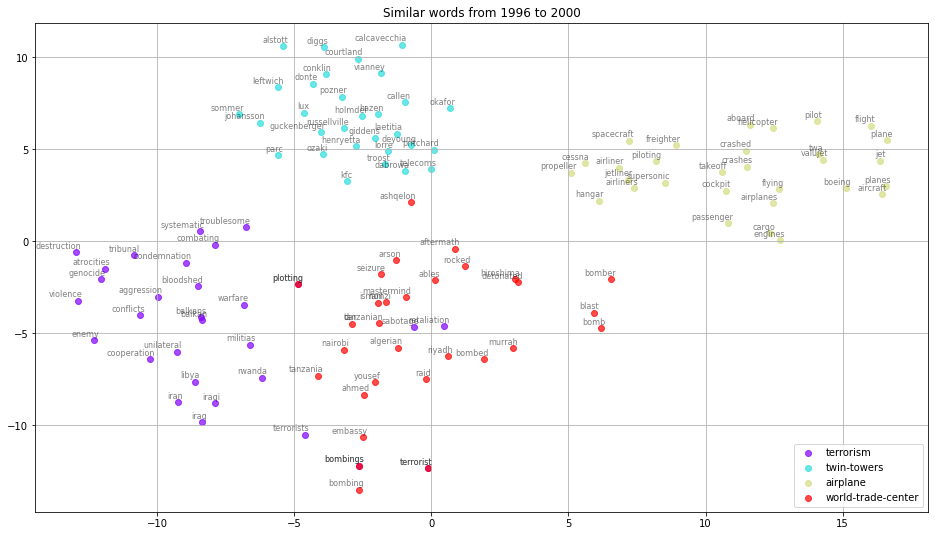

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
% matplotlib inline


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words from 1996 to 2000', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words_cade_pre2001.png')

## Slice 2001 - Plot most similar words to a list of words

In [ ]:
keys = ['terrorism', 'twin-towers', 'airplane', 'world-trade-center']


embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in slice_2001.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(slice_2001[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


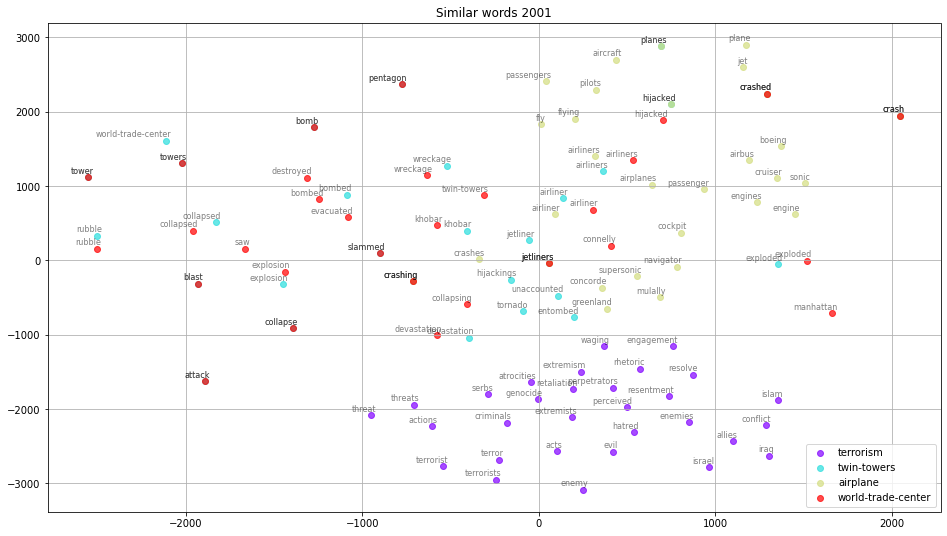

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
% matplotlib inline


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words 2001', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words_cade2001.png')

## Plot contextual variability

In [ ]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def context_var(words, embedding):
  
  X = embedding[words]
  pca = PCA(n_components=2)
  
  emb_pca = pca.fit_transform(X)

  plt.scatter(emb_pca[:, 0], emb_pca[:, 1])

  for id, word in enumerate(words):
    # annotate
    plt.annotate(word, xy=(emb_pca[id, 0], emb_pca[id, 1]))
  plt.xticks([])
  plt.yticks([])  

  plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


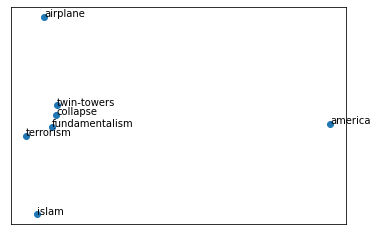

In [ ]:
context_var(['america', 'twin-towers', 'terrorism', 'collapse', 'airplane', 'islam', 'fundamentalism'], slice_pre2001)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


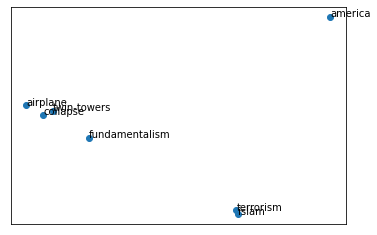

In [ ]:
context_var(['america', 'twin-towers', 'terrorism', 'collapse', 'airplane', 'islam', 'fundamentalism'], slice_2001)